![Imagen](http://www.eafit.edu.co/SiteCollectionImages/logo.png?raw=true "")


<h1 align="center">Dinámica de Fluidos Computacional Aplicada - IM0642</h1>

<h2 align="center">Sesión 01: Introducción a CFD y Motivación

<h2 align="center">ESCUELA DE INGENIERÍA</h2>

<h2 align="center">Especialización en Turbomáquinas</h2>

<h3 align="center">MEDELLÍN - COLOMBIA </h3>

<h3 align="center">2019/01 </h3>

# Introductión to CFD

- Fluid (gas and liquid) flows are governed by Partial Differential Equations ($PDE$) which represent conservation laws for the $mass$, $momentum$, and $energy$.


- Computational Fluid Dynamics ($CFD$) is the art of replacing such $PDE$ systems by a set of algebraic equations which can be solved using digital computers


- Provides a qualitative (and sometimes even quantitative) prediction of fluid flows by means of:
  - Mathematical modeling (partial differential equations)
  - Numerical methods (discretization and solution techniques)
  - Software tools (solvers, pre- and postprocessing utilities)
  - $CFD$ enables scientists and engineers to perform ‘numerical experiments’ (i.e. computer simulations) in a ‘virtual flow laboratory’


# Mathematical and Computational Model

<strong>- Mathematical Model:</strong> Collection of mathematical constructions that provide abstractions of a physical event consistent with a scientific theory proposed to cover that event.


<strong>- Computational Model:</strong> Discrete version of a mathematical model that has been designed to be implemented in a machine.

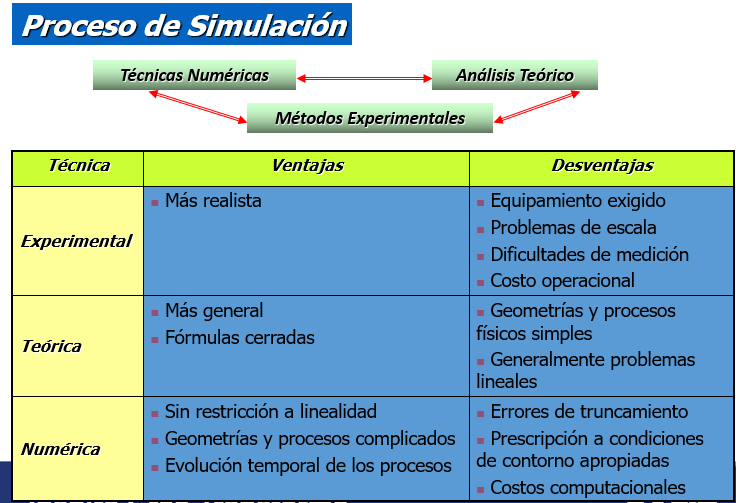

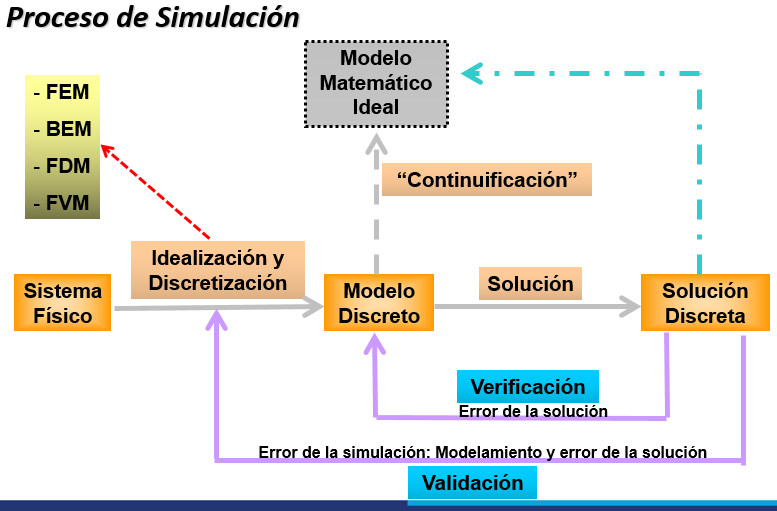

### Example 01: 


From Newton's Second Law:

$$\vec{F}  = m  \vec{a}$$

Clearing $\vec{a}$ and representing it as the rate of change of velocity, $\vec{v}$, with respect to time, $t$.


$$\frac{d\vec{v}}{dt} = \frac{\vec{F}}{m}$$

$$\vec{F} = \vec{FD} + \vec{FU}$$

$$\vec{FD} = m  \vec{g}$$

$$\vec{FU} = -c  \vec{v}$$

$$\frac{d\vec{v}}{dt} = \frac{(m\vec{g} - c\vec{v})}{m}$$

Simplifying

$$\frac{d\vec{v}}{dt} = \vec{g} - c \frac{\vec{v}}{m}$$

$EDO$ that relates the acceleration of a falling body, with the forces acting on it.

- If the object is initially at rest $\left(t = 0, v(t=0) = 0\right)$:

$$v(t) = \frac{m\vec{g}}{c}\left(1 - e^{-\frac{c}{m}t}\right)$$


> <strong>Statement:</strong> A parachutist with mass, $m = 68.1 kg$ jumps from a fixed balloon. Calculate the speed before opening the parachute. The coefficient of resistance is approximately $c = 12.5 kg / s$. Acceleration due to gravity $\vec{g} = 9.8 m/s2$.

### <strong>- Analitic Solution (exact solution):</strong>

Substituting the values in the previous equation:

$$v(t) = \frac{9.8 \times 68.1}{12.5}\left(1 - e^{-\frac{12.5}{68.1}t}\right)$$

In [1]:
# <-- comments in python are denoted by the pound sign, like this one

import numpy as np               # import the array library
import matplotlib.pyplot as plt  # import plotting library

In [2]:
# Constants

m = 68.1
c = 12.5
g = 9.81
dt = 1.0
n = 50

cte1 = m / c
cte2 = 1.0 / cte1

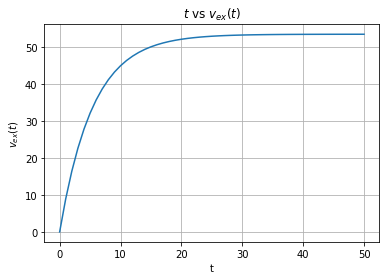

In [3]:
# Exact Solution Plot:

def f(t,cte1,cte2):
    return g*cte1*(1-np.exp(-cte2*t))

t = np.arange(0.0, n+1, dt)
plt.xlabel (r"t")
plt.ylabel (r'$v_{ex}(t)$')
plt.title (r'$t$ vs $v_{ex}(t)$')
plt.plot(t, f(t,cte1,cte2))
plt.grid(True)
plt.show()

### <strong>- Numerical Solution (Discrete Solution):</strong>

> Approximating the rate of change of speed versus time:

$$\frac{dv}{dt} \approx \frac{\Delta v}{\Delta t}=\frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i}$$

> from calculus:

$$\frac{dv}{dt} = \lim_{\Delta t \rightarrow  0} \frac{\Delta v}{\Delta t}$$

> This equation is called $\textbf{Divided Finite Difference}$, and is an approximation of the derivative in time $t_i$.

> Substituting in the approximate equation:

$$\frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i}=g-\frac{c}{m}v(t_i)$$

> rearranging:

$$v(t_{i+1})=v(t_{i})+\left(g-\frac{c}{m}v(t_{i})\right)\left(t_{i+1}-t_{i}\right)$$

> The meaning of the above equation can be summarized as follows:

### <strong> $New$ $value$ $=$ $Previous$ $value$ $+$ $slope$ $\times$ $Step$ $size$</strong>

> At the beginning of the calculations ($t = 0$), the parachute velocity is equal to zero ($0$). With this information and the given parameter values, the last equation can be used to calculate the velocity at each of the following times.

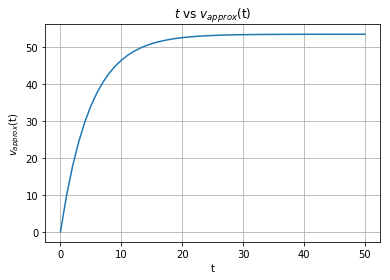

In [4]:
# Approximate Solution (Discrete Solution)

t = np.arange(0.0, n+1, dt)
vap = np.zeros(n+1)
dt = t[1]-t[0]

for i in range(1,n+1):
    vap[i] = vap[i-1] + (g-cte2*vap[i-1])*dt

plt.xlabel (r"t")
plt.ylabel (r"$v_{approx}$(t)")
plt.title (r"$t$ vs $v_{approx}$(t)")
plt.plot (t, vap)
plt.grid(True)
plt.show()

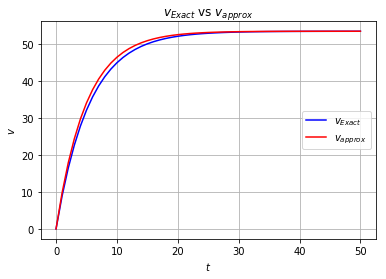

In [5]:
plt.xlabel (r"$t$")
plt.ylabel (r"$v$")
plt.title (r"$v_{Exact}$ vs $v_{approx}$")
plt.plot(t, f(t,cte1,cte2),'b', label='$v_{Exact}$')
plt.plot(t, vap,'r', label='$v_{approx}$')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

### General Strategy:

 *Replace a difficult problem with an easier one that has the same solution*


- Infinite processes by finite processes:

  - Integrals by series;

  - Derivative by finite differences;

- Complex functions by simple functions: e.g. Polynomials

- Nonlinear Problems by Linear one

- Differential by Algebraic Equations

- High order by low order systems

### Experiment vs Simulations


$CFD$ gives an insight into flow patterns that are difficult, expensive or impossible to study using traditional (experimental) techniques: 


| Experiments                        | Simulations                                  |
|:-----------------------------------|:---------------------------------------------|
| Quantitative description of flow phenomena using measurements:| Quantitative prediction of flow phenomena using CFD software:|
| - For one quantity at a time                                  | - For all desired quantities                                 |
| - At a limited number of points and time instants             | - With high resolution in space and time                     |
| - For a laboratory-scale model                                | - For the actual flow domain                                 |
| - For a limited range of problems and operating conditions  | - For virtually any problem and realistic operating conditions.|
|                                                               |                                                              |
| <strong>Error sources:</strong> measurement errors, flow disturbances by the probes | <strong>Error sources:</strong> modeling, discretization, iteration, implementation


### Experiment vs Simulations (cont ...)

As a rule, $CFD$ does not replace the measurements completely but the amount of experimentation and the overall cost can be significantly reduced.

| Experiments                        | Simulations                                  |
|:-----------------------------------|:---------------------------------------------|
| - Expensive                        | - Cheap(er)                                  |
| - Slow                             | - Fast(er)                                   |
| - Sequential                       | - Parallel                                   |
| - Single - Purpose                 | - Multiple-Porpose                           |


- Equipment and personnel are difficult to transport


- $CFD$ software is portable, easy to use and modify

The results of a $CFD$ simulation are never 100% reliable because:

• Input data may involve too much guessing or imprecision;


• Mathematical model of the problem at hand may be inadequate;


• Accuracy of the results is limited by the available computing power.

### Fluids Characteristics

#### Macroscopic Properties

- $\rho$: Density

- $\mu$: Voscotity

- $p$: Pressure

- $T$: Temperature

- $v$: Velocity

#### Classsification of fluid flows

| Clasificacion            |         fluidos     |
|:-------------------------|:--------------------|
| - Viscous                | - Inviscid          |
| - Compressible           | - Incompressible    |
| - Steady                 | - Unsteady          |
| - Laminar                | - Turbulent         |
| - Single - Phase         | - Multiphase        |


The reliability of $CFD$ simulations is greater:

• for laminar/slow flows than for turbulent/fast ones;

• for single-phase flows than for multi-phase flows;

• for chemically inert systems than for reactive flows

### How does CFD make predictions?

- $CFD$ uses a computer to solve the mathematical equations for the problem at hand. 


- The main components of a $CFD$ design cycle are as follows:

  - The $human$ $being$ (analyst) who states the problem to be solved;

  - $Scientific$ $knowledge$ (models, methods) expressed mathematically;

  - The $computer$ $code$ (software) which embodies this knowledge and provides detailed instructions (algorithms)

  - The $computer$ $hardware$ which performs the actual calculations

  - The $human$ $being$ who inspects and interprets the simulation results


- $CFD$ is a highly interdisciplinary research area which lies at the interface of physics, applied mathematics, and computer science


### CFD analysis process

<strong>- Problem statement:</strong> information about the flow;


<strong>- Mathematical model:</strong> $IBVP = PDE + IC + BC$;


<strong>- Mesh generation:</strong> nodes/cells, time instants;


<strong>- Space discretization:</strong> coupled $ODE/DAE$ systems;


<strong>- Time discretization:</strong> algebraic system $[A]{x} = {b}$;


<strong>- Iterative solver:</strong> discrete function values;


<strong>- $CFD$ software:</strong> implementation, debugging;


<strong>- Simulation run:</strong> parameters, stopping criteria;


<strong>- Postprocessing:</strong> visualization, analysis of data;


<strong>- Verification:</strong> model validation / adjustment.


### Problem statement

- What is $known$ $about$ $the$ $flow$ $problem$ to be dealt with?


- What $physical$ $phenomena$ $need$ to be taken into account?


- What is the $geometry$ $of$ $the$ $domain$ and $operating$ $conditions$?


- Are there $any$ $internal$ $obstacles$ or free surfaces/interfaces?


- What is the $type$ $of$ $flow$ (laminar/turbulent, steady/unsteady)?


- What is the $objective$ $of$ $the$ $CFD$ $analysis$ to be performed?

  - computation of integral quantities (lift, drag, yield)

  - snapshots of field data for velocities, concentrations etc.

  - shape optimization aimed at an improved performance


- What is the easiest/cheapest/fastest way to achieve the goal?


### Mathematical model

- $Choose$ $a$ $suitable$ $flow$ $model$ (viewpoint) and reference frame;


- $Identify$ $the$ $forces$ which cause and influence the fluid motion;


- $Define$ $the$ $computational$ $domain$ in which to solve the problem,


- $Formulate$ $conservation$ $laws$ for the Mass, Momentum, and Energy;


- $Simplify$ $the$ $governing$ $equations$ to reduce the computational effort:
 
  - use available information about the prevailing flow regime
  
  - check for symmetries and predominant flow directions (1D/2D)
  
  - neglect the terms which have little or no influence on the results
  
  - model the effect of small-scale fluctuations that cannot be captured
  
  - incorporate a priori knowledge (measurement data, CFD results)


- $Add$ $constitutive$ $relations$ and specify initial/boundary conditions.



### Discretization process

The $PDE$ system is transformed into a set of $Differential$ $Algebraic$ $Equations$ $(DAE)$:

- $Mesh$ $generation$ (decomposition into cells/elements)

  - structured or unstructured, triangular or quadrilateral?

  - CAD tools + grid generators (Delaunay, advancing front)

  - mesh size, adaptive refinement in ‘interesting’ flow regions


- $Space$ $discretization$ (approximation of spatial derivatives)

  - finite differences/volumes/elements

  - high- vs. low-order approximations


- $Time$ $discretization$ (approximation of temporal derivatives)

  - explicit vs. implicit schemes, stability constraints

  - local time-stepping, adaptive time step control


### Iterative solution strategy

The coupled nonlinear algebraic equations must be solved iteratively

- $Outer$ $iterations$: the coefficients of the discrete problem are updated using the solution values from the previous iteration so as to

  - get rid of the nonlinearities by a Newton-like method
  
  - solve the governing equations in a segregated fashion


- $Inner$ $iterations$: the resulting sequence of linear subproblems is typically solved by an iterative method (conjugate gradients, multigrid) because direct solvers (Gaussian elimination) are prohibitively expensive


- $Convergence$ $criteria$: it is necessary to check the residuals, relative solution changes and other indicators to make sure that the iterations converge.


As a rule, the algebraic systems to be solved are very large (millions of unknowns) but sparse, i.e., most of the matrix coefficients are equal to zero.


### $CFD$ simulations

The $computing$ $times$ for a flow simulation depend on:

- the $choice$ $of$ $numerical$ $algorithms$ and data structures;

- $linear$ $algebra$ $tools$, stopping criteria for iterative solvers;

- $discretization$ $parameters$ (mesh quality, mesh size, time step);

- $cost$ $per$ $time$ $step$ and convergence rates for outer iterations;

- $programming$ $language$ (most $CFD$ codes are written in $Fortran$);

- $many$ $other$ $things$ (hardware, vectorization, parallelization etc.);

### $CFD$ simulations

The $quality$ $of$ $simulation$ results depends on:

- the $mathematical$ $model$ and underlying assumptions;

- $approximation$ $type$, stability of the numerical scheme;

- mesh, time step, error indicators, stopping criteria . . .

### Postprocessing and analysis

Postprocessing of the simulation results is performed in order to extract the desired information from the computed flow field:

- calculation of derived quantities (streamfunction, vorticity);


- calculation of integral parameters (lift, drag, total mass);


- visualization (representation of numbers as images):

  - $1D$ data: function values connected by straight lines;
  - $2D$ data: streamlines, contour levels, color diagrams;
  - $3D$ data: cutlines, cutplanes, isosurfaces, isovolumes;
  - arrow plots, particle tracing, animations . . .


- Systematic data analysis by means of statistical tools;


- Debugging, verification, and validation of the $CFD$ model.


### Uncertainty and error

Whether or not the results of a $CFD$ $simulation$ $can$ $be$ $trusted$ $depends$ $on$ the degree of uncertainty and on the cumulative effect of various errors.


- Uncertainty is defined as a potential deficiency due to the lack of knowledge (turbulence modeling is a classical example)


- Error is defined as a recognizable deficiency due to other reasons


  - Acknowledged errors have certain mechanisms for identifying, estimating and possibly eliminating or at least alleviating them;
  
  
  - Unacknowledged errors have no standard procedures for detecting them and may remain undiscovered causing a lot of harm;


  - Local errors refer to solution errors at a single grid point or cell;


  - Global errors refer to solution errors over the entire flow domain.


Local errors contribute to the global error and may move throughout the grid.

### Classification of errors

*Acknowledged errors*

- Physical modeling error due to uncertainty and deliberate simplifications;


- Discretization error   approximation of $PDEs$ by algebraic equations

  - spatial discretization error due to a finite grid resolution;

  - temporal discretization error due to a finite time step size;


- Iterative convergence error which depends on the stopping criteria;


- Round-off errors due to the finite precision of computer arithmetic

### Classification of errors

*Unacknowledged errors*


- Computer programming error: “bugs” in coding and logical mistakes;


- Usage error: wrong parameter values, models or boundary conditions

*Awareness of these error sources and an ability to control or preclude the error are important prerequisites for developing and using $CFD$ software*

### Verification of $CFD$ codes

Verification amounts to looking for errors in the implementation of the models (loosely speaking, the question is: “$are$ $we$ $solving$ $the$ $equations$ $right$”?)

- <strong>Examine the computer programming</strong> by visually checking the source code, documenting it and testing the underlying subprograms individually;


- <strong>Examine iterative convergence</strong> by monitoring the residuals, relative changes of integral quantities and checking if the prescribed tolerance is attained;


- <strong>Examine consistency</strong> (check if relevant conservation principles are satisfied);


- <strong>Examine grid convergence:</strong> as the mesh and/or and the time step are refined, the spatial and temporal discretization errors, respectively, should asymptotically approach zero (in the absence of round-off errors);


- <strong>Compare the computational results with analytical and numerical solutions</strong> for standard benchmark configurations (representative test cases).


### Validation of $CFD$ models

Validation amounts to checking if the model itself is adequate for practical purposes (loosely speaking, the question is: “$are$ $we$ $solving$ $the$ $right$ $equations$”?)


- <strong>Verify the code</strong> to make sure that the numerical solutions are correct;


- <strong>Compare the results</strong> with available experimental data (making a provision for measurement errors) to check if the reality is represented accurately enough;


- <strong>Perform sensitivity analysis</strong> and a parametric study to assess the inherent uncertainty due to the insufficient understanding of physical processes;


- <strong>Try using different models</strong>, geometry, and initial/boundary conditions;


- <strong>Report the findings</strong>, document model limitations and parameter settings.


*The goal of verification and validation is to ensure that the $CFD$ code produces reasonable results for a certain range of flow problems*.


### Available CFD software

- [ANSYS: CFX/Fluent:](https://www.ansys.com)

- [Flow3D](https://www.flow3d.com/)

- [OpenFoam: ](https://www.openfoam.com)

- [Star-CCM: ](https://www.cd-adapco.com)

- [Comsol: ](https://www.comsol.com)

- [FEATFLOW: ](https://www.featflow.de)

$\vdots$

- [CFD-OnLine](https://www.cfd-online.com)